# Import Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
import pycaret

# Read the data and EDA

In [2]:
dataset = pd.read_table("/home/rghaf/Desktop/Uni/NLP/SMSSpamCollection", header = None, encoding = 'utf8')
dataset.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df = pd.DataFrame({"Status": dataset.iloc[:, 0], "Text": dataset.iloc[:, 1]})
df.head()

,Status,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Status  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
print(df['Status'].value_counts())
print(df['Status'].value_counts(normalize=True) * 100)

ham     4825
spam     747
Name: Status, dtype: int64
ham     86.593683
spam    13.406317
Name: Status, dtype: float64


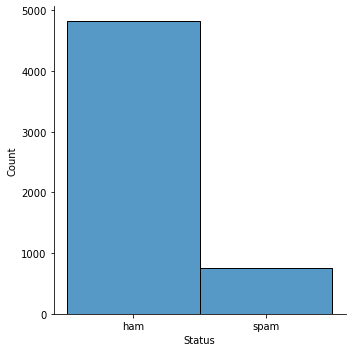

In [6]:
sns.displot(data=df, x="Status")

# Preprocessing

In [7]:
df["Status"] = df["Status"].map({"spam": 1, "ham": 0})
df.head()
# Also LabelEncoder is available for this part

,Status,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
y = df.iloc[:, 0]
y[:5]

0    0
1    0
2    1
3    0
4    0
Name: Status, dtype: int64

In [9]:
text_messages = df.iloc[:, 1]
text_messages[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Text, dtype: object

In [10]:
# Replacing emails, phones, ...

texts = text_messages.str.replace(r'\d+(\.\d+)?', 'number') #Numbers 

texts = texts.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber') #Phone numbers

texts = texts.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress') #Emails

texts = texts.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress') #URLS

texts = texts.str.replace(r'[^\w\d\s]', ' ') # Remove punctuation with regex method

texts = texts.str.replace(r'\s+', ' ') # Replace whitespace between terms with a single space

texts = texts.str.replace(r'^\s+|\s+?$', '') # Remove leading and trailing whitespace

/tmp/ipykernel_16921/1386571516.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  texts = text_messages.str.replace(r'\d+(\.\d+)?', 'number') #Numbers
/tmp/ipykernel_16921/1386571516.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  texts = texts.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber') #Phone numbers
/tmp/ipykernel_16921/1386571516.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  texts = texts.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress') #Emails
/tmp/ipykernel_16921/1386571516.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  texts = texts.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress') #URLS
/tmp/ipykernel_16921/1386571516.py:11: FutureWarning: The default value of regex will change from True to False in a

In [11]:
# Make all words lower case
texts = texts.str.lower()
print(texts)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in number a wkly comp to win fa cup...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the numbernd time we have tried number...
5568                  will ü b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Text, Length: 5572, dtype: object


In [12]:
# remove StopWords ==> words without meaning removed a, an, the and ...
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
texts = texts.apply(lambda x: ' '.join(term for term in x.split() if term not in sw))
print(texts)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry number wkly comp win fa cup final t...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    numbernd time tried number contact u u number ...
5568                          ü b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Text, Length: 5572, dtype: object


[nltk_data] Downloading package stopwords to /home/rghaf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# remove Stemming
ps = nltk.PorterStemmer()
texts = texts.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
print(texts)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri number wkli comp win fa cup final t...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    numbernd time tri number contact u u number po...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5572, dtype: object


In [14]:
#Tokenize words
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

words_bag = []
for txt in texts:
    words = word_tokenize(txt)
    for word in words:
        words_bag.append(word)

words_bag = nltk.FreqDist(words_bag)
print(len(words_bag))
print(words_bag.most_common(10))

6559
[('number', 3086), ('u', 1207), ('call', 679), ('go', 456), ('get', 451), ('ur', 391), ('gt', 318), ('lt', 316), ('come', 304), ('ok', 293)]


In [15]:
#Words use a as features
features_word = list(words_bag.keys())[:1000]

In [17]:
#find features of each text
def find_feature(txt):
    words = word_tokenize(txt)
    features = {}
    for word in features_word:
        features[word] = (word in words)
    return features

#Example :
features = find_feature(texts[0])
for key, value in features.items():
    if value == True:
        print(key)
print(texts[0])

go
jurong
point
crazi
avail
bugi
n
great
world
la
e
buffet
cine
got
amor
wat
go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [19]:
#merge datas
text_messages = zip(texts, y)

In [20]:
#find features for all maessages
all_features = [(find_feature(text), label) for (text, label) in text_messages]

In [28]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(all_features, test_size = 0.25)

In [29]:
print(len(train_data))
print(len(test_data))

4179
1393


In [36]:
final_train_data = pd.DataFrame (train_data, columns = ['x', 'y'])
final_test_data = pd.DataFrame (test_data, columns = ['x', 'y'])

# Train Model

In [41]:
from pycaret.classification import *
cf = setup(data = final_train_data, target = 'y', pca_method='linear', pca_components=3, silent = True)

,Description,Value
0,session_id,2528
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4179, 2)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8988,0.6178,0.2372,1.0000,0.3782,0.3466,0.4549,2.8530
svm,SVM - Linear Kernel,0.8988,0.0000,0.2372,1.0000,0.3782,0.3466,0.4549,0.2460
ridge,Ridge Classifier,0.8988,0.0000,0.2372,1.0000,0.3782,0.3466,0.4549,0.3690
rf,Random Forest Classifier,0.8988,0.6178,0.2372,1.0000,0.3782,0.3466,0.4549,3.5490
et,Extra Trees Classifier,0.8988,0.6178,0.2372,1.0000,0.3782,0.3466,0.4549,6.7570
knn,K Neighbors Classifier,0.8769,0.6078,0.0772,0.7667,0.1392,0.1227,0.2234,3.3780
ada,Ada Boost Classifier,0.8769,0.5547,0.0722,0.9000,0.1327,0.1177,0.2358,1.0360
gbc,Gradient Boosting Classifier,0.8721,0.5935,0.0360,0.8000,0.0686,0.0602,0.1557,3.6870
lr,Logistic Regression,0.8674,0.6729,0.0000,0.0000,0.0000,0.0000,0.0000,0.7210
qda,Quadratic Discriminant Analysis,0.8674,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.9930


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2798, splitter='best')

In [42]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8976,0.6053,0.2105,1.0000,0.3478,0.3170,0.4340
1,0.9044,0.6316,0.2632,1.0000,0.4167,0.3833,0.4870
2,0.8942,0.5921,0.1842,1.0000,0.3111,0.2821,0.4053
3,0.9113,0.6579,0.3158,1.0000,0.4800,0.4455,0.5353
4,0.9044,0.6410,0.2821,1.0000,0.4400,0.4052,0.5040
5,0.8938,0.5921,0.1842,1.0000,0.3111,0.2820,0.4052
6,0.9178,0.6842,0.3684,1.0000,0.5385,0.5037,0.5802
7,0.9178,0.6842,0.3684,1.0000,0.5385,0.5037,0.5802
8,0.9075,0.6671,0.3421,0.8667,0.4906,0.4501,0.5094
9,0.9007,0.6184,0.2368,1.0000,0.3830,0.3506,0.4611


# Prediction

In [44]:
prediction = predict_model(dt, data=final_test_data)

In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(final_test_data["y"], prediction["Label"])
print("accuracy: ", accuracy)

accuracy:  0.9002153625269204


/home/rghaf/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/rghaf/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/home/rghaf/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rghaf/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/rghaf/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMet